# Homework 9
### Grant White

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from numpy import pi, sin, cos, arccos, sqrt
from numpy.polynomial.chebyshev import Chebyshev as Ch
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def spectral(N, a=0, b=1, alpha=-1, beta=3/2, eps=.01):
    
    #Chebyshev
    x = cos(pi*(1 - np.linspace(a, b, N+1)))
    T = np.array([cos(n*arccos(x)) for n in range(N+1)])
    dT = np.array([n*sin(n*arccos(x))/sqrt(1 - x**2) for n in range(N+1)])
    d2T = np.array([n*x*sin(n*arccos(x))/(1 - x**2)**(3/2)
                     - n**2*cos(n*arccos(x))/(1 - x**2) for n in range(N+1)])
    def p(coef):
        temp = np.sum(coef.T * T, axis=1)
        temp[0] -= alpha
        temp[-1] -= beta
        return temp
    dp = lambda coef: np.sum(coef.T * dT, axis=1)
    d2p = lambda coef: np.sum(coef.T * d2T, axis=1)
    
    #initial guess
    w = (a - b + beta - alpha) / 2
    x_bar = (a + b - alpha - beta) / 2
    u = x - x_bar + w*np.tanh(w*(x - x_bar)/(2*eps))
    guess = Ch.fit(x, u, N).convert().coef
    
    #solve for coefficients
    fun = lambda coef: 4*eps*d2p(coef) + p(coef)*(2*dp(coef) - 1)
    coef = fsolve(fun, guess)
    
    #change of variables
    new_x = (a + b)/2 + (b - a)/2*x
    new_T = np.array([cos(n*arccos(new_x)) for n in range(N+1)])
    p = coef.T @ new_T
    p[0] = alpha
    p[-1] = beta
    
    return new_x, p

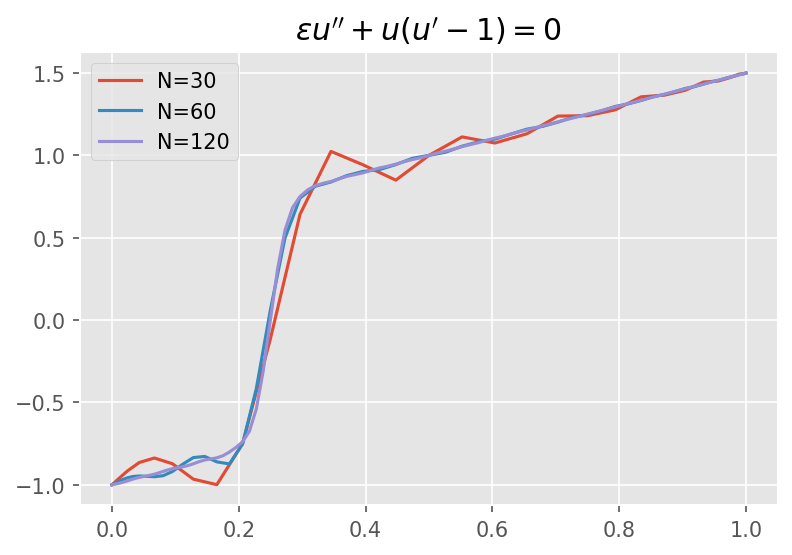

In [3]:
#get approximations
N1, N2, N3 = 30, 60, 120
x1, u1 = spectral(N1)
x2, u2 = spectral(N2)
x3, u3 = spectral(N3)

#plot
plt.figure(dpi=150)
plt.title("$\epsilon u'' + u(u'-1) = 0$")
plt.plot(x1, u1, label='N={}'.format(N1))
plt.plot(x2, u2, label='N={}'.format(N2))
plt.plot(x3, u3, label='N={}'.format(N3))
plt.legend()
plt.show()